# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer

sns.set_theme(style='whitegrid')
plt.rcParams['figure.dpi'] = 120



# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Maaf, saya running di local :))
# data_path = Path('../Dataset/bank-transactions-dataset.csv')
# df = pd.read_csv(data_path)

url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
df.head()


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
df.describe(include='all')


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

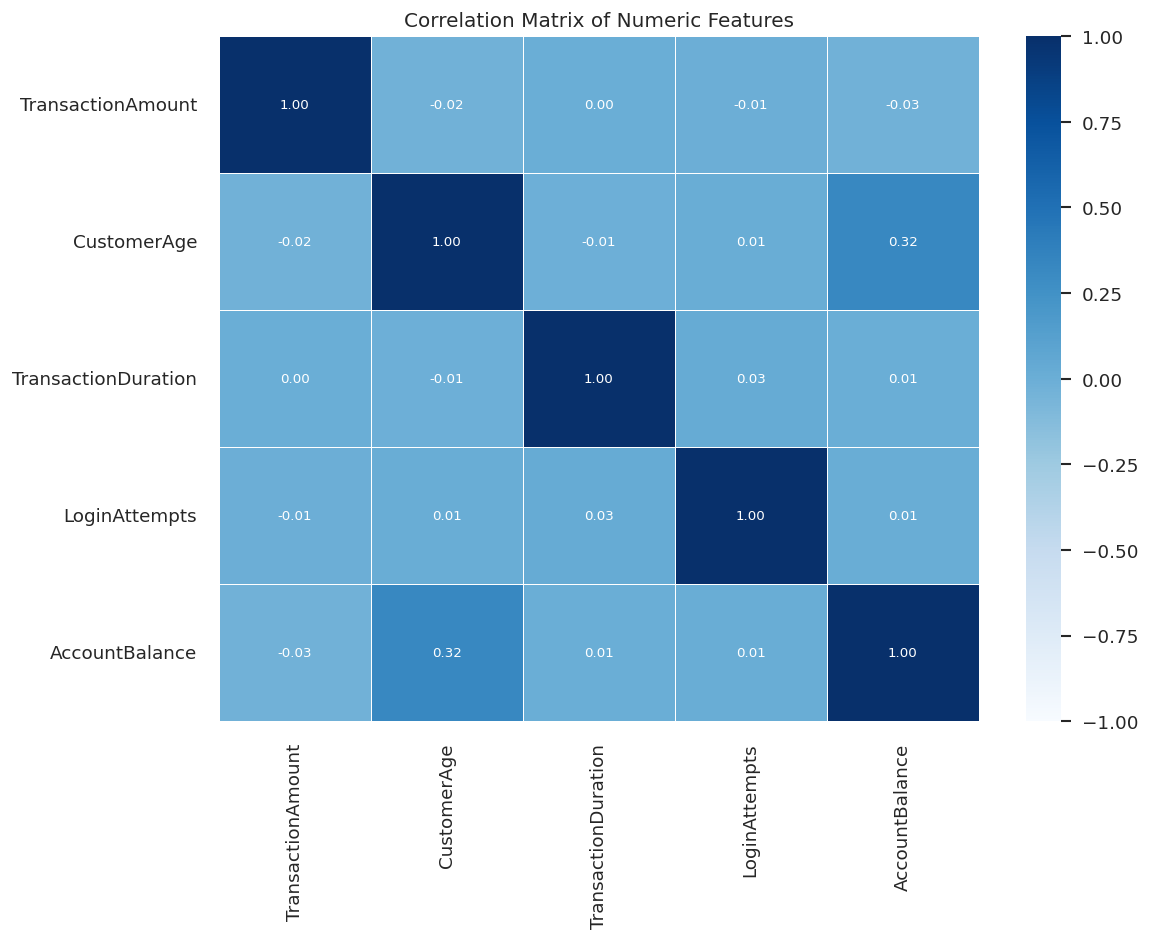

In [6]:
numeric_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot_kws={'size': 8}
)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()


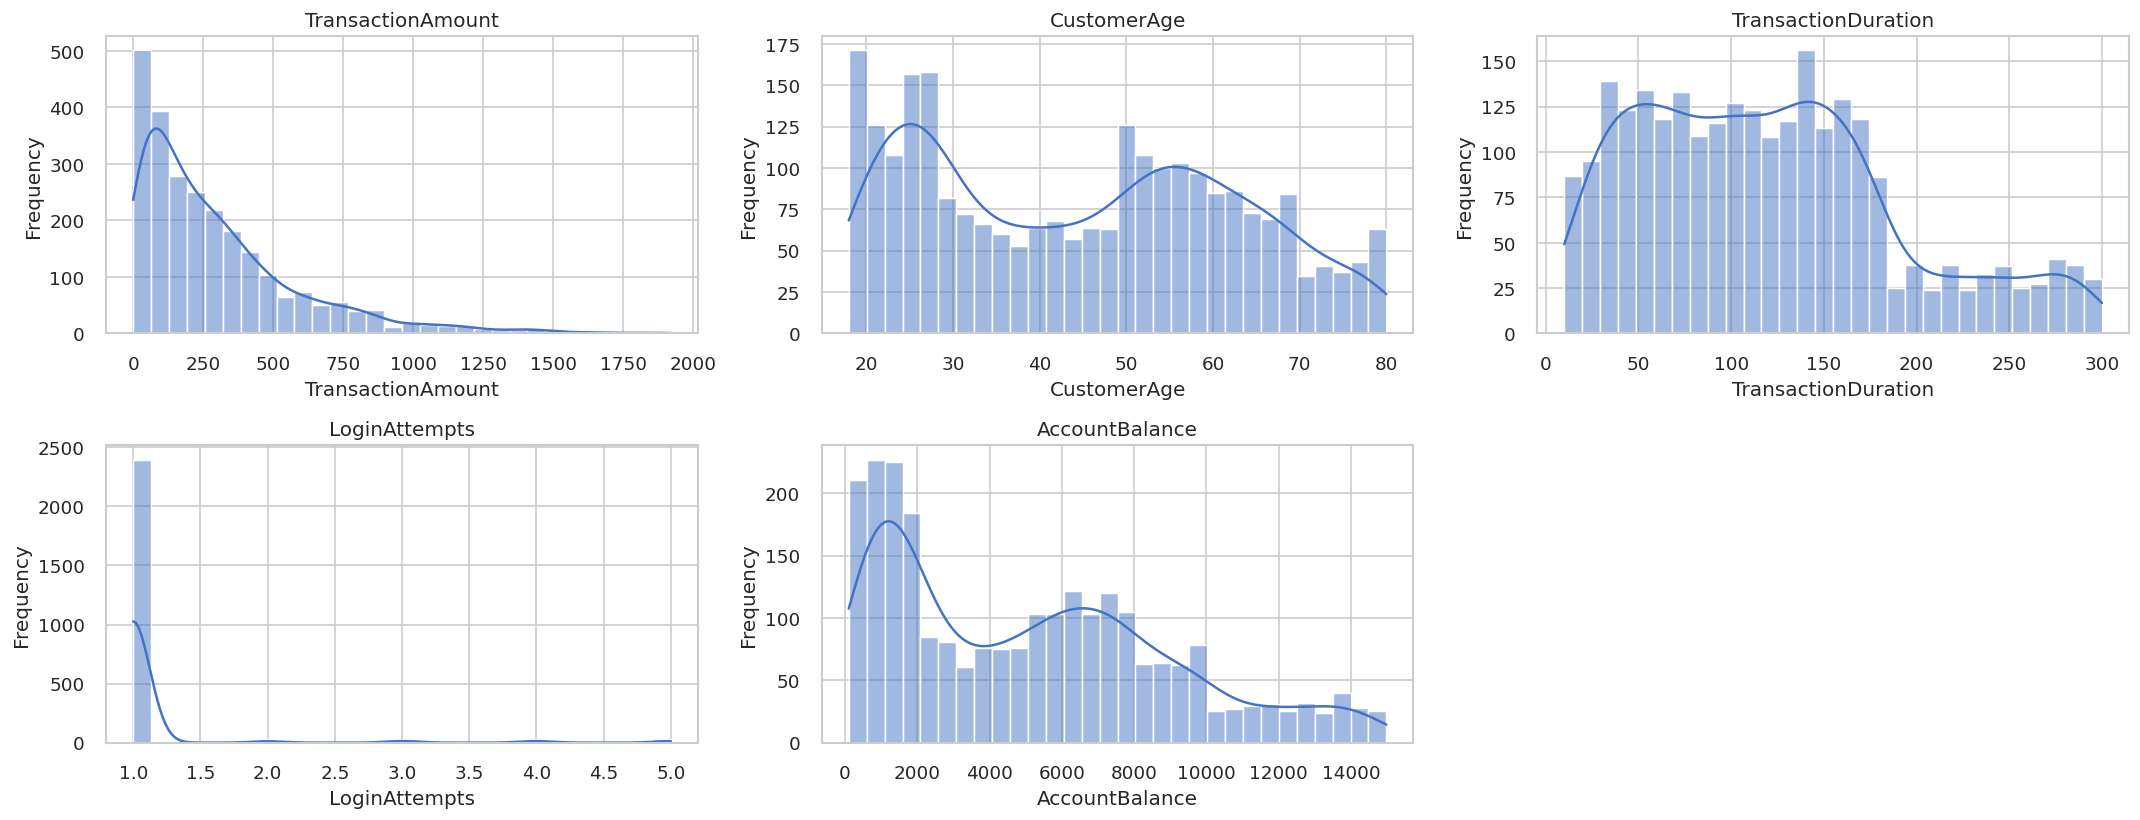

In [7]:
numeric_cols = df.select_dtypes(include='number').columns

cols = 3
rows = (len(numeric_cols) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 3.5 * rows))
axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]

for ax, column in zip(axes, numeric_cols):
    sns.histplot(df[column], kde=True, bins=30, ax=ax, color='#4472C4')
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

for ax in axes[len(numeric_cols):]:
    ax.remove()

plt.tight_layout()


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

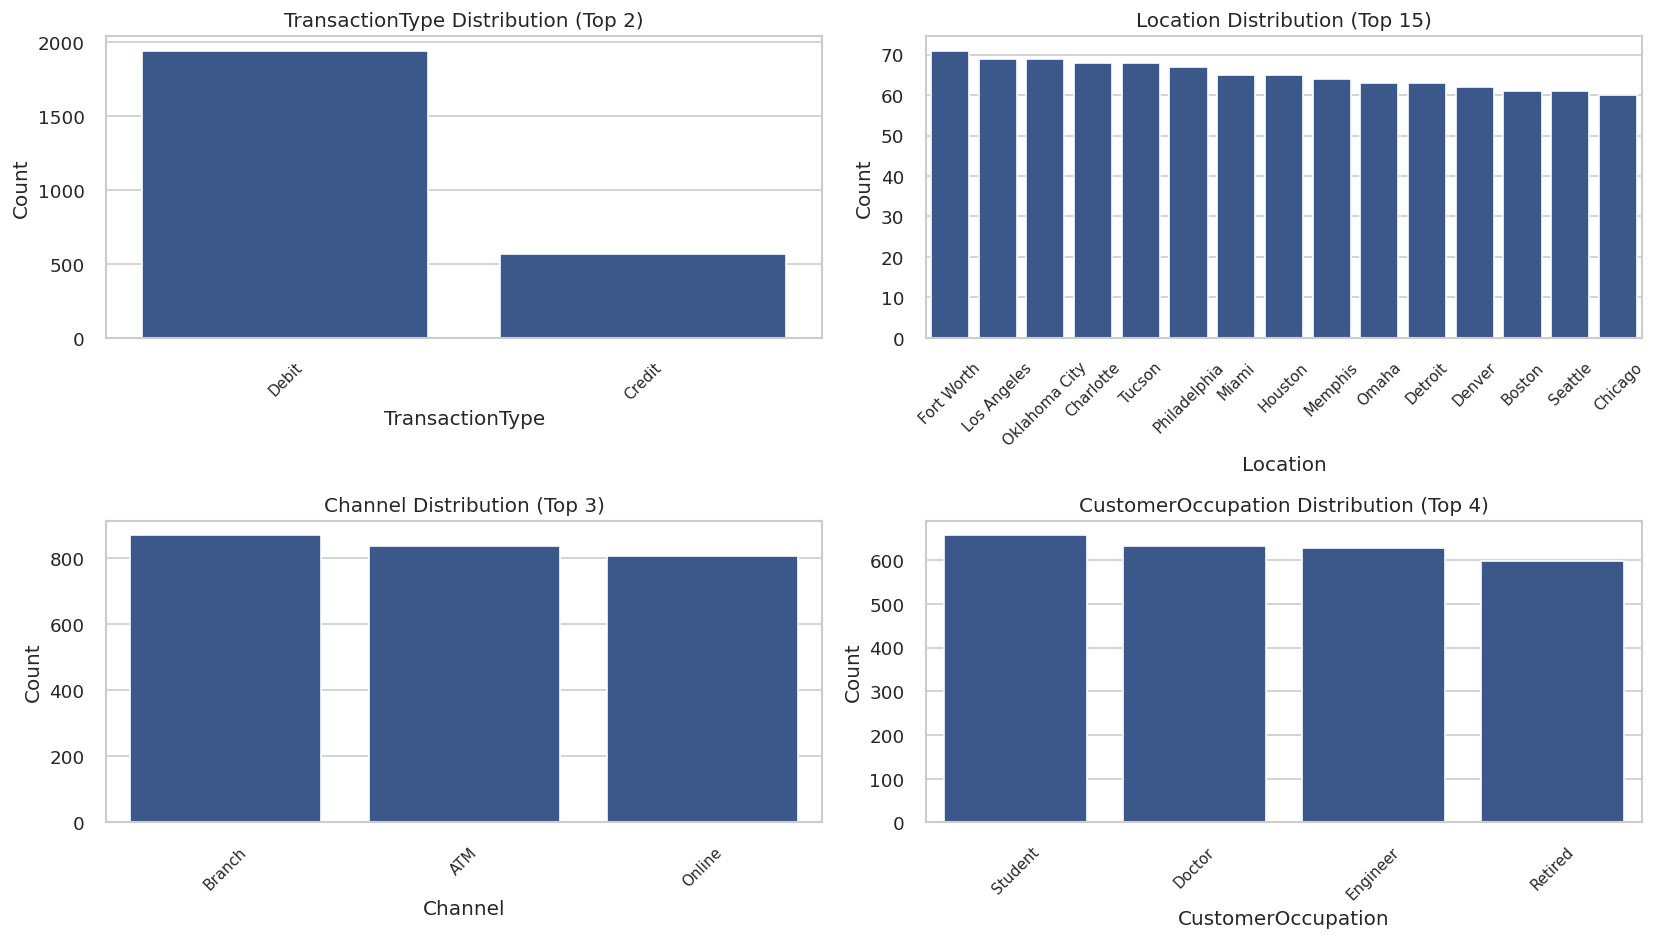

In [8]:
categorical_cols = [
    col
    for col in df.select_dtypes(include='object').columns
    if not any(keyword in col for keyword in ['ID', 'Address', 'Date'])
]

if categorical_cols:
    cols = 2
    rows = (len(categorical_cols) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 4 * rows))
    axes = axes.flatten() if hasattr(axes, 'flatten') else [axes]

    for ax, column in zip(axes, categorical_cols):
        value_counts = df[column].value_counts().nlargest(15)
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, color='#2f5597')
        ax.set_title(f'{column} Distribution (Top {len(value_counts)})')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45, labelsize=9)

    for ax in axes[len(categorical_cols):]:
        ax.remove()

    plt.tight_layout()
else:
    print('Tidak ada fitur kategorikal relevan untuk divisualisasikan.')


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
df_clean = df.copy()
missing_values = df_clean.isnull().sum().sort_values(ascending=False)
missing_values


,0
Location,30
DeviceID,30
TransactionType,30
TransactionID,29
TransactionDate,28
Channel,27
AccountBalance,27
TransactionAmount,26
TransactionDuration,26
PreviousTransactionDate,24


In [10]:
duplicate_count = df_clean.duplicated().sum()
duplicate_count


np.int64(21)

In [11]:
numeric_cols = df_clean.select_dtypes(include='number').columns.tolist()
continuous_features = numeric_cols.copy()
numeric_scaler = StandardScaler()
df_clean[numeric_cols] = numeric_scaler.fit_transform(df_clean[numeric_cols])
df_clean[numeric_cols].head()


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315
1,0.268963,1.307715,0.307960,-0.204629,2.218381
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694
4,-0.972736,NaN,1.121495,-0.204629,0.594263


In [12]:
id_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df_clean = df_clean.drop(columns=[col for col in id_columns if col in df_clean.columns])
df_clean.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [13]:
categorical_cols = df_clean.select_dtypes(include='object').columns.tolist()
label_encoders = {}
if categorical_cols:
    for col in categorical_cols:
        encoder = LabelEncoder()
        df_clean[col] = encoder.fit_transform(df_clean[col].astype(str))
        label_encoders[col] = encoder
    df_clean[categorical_cols].head()
else:
    print('Tidak ada fitur kategorikal untuk diencode.')


In [14]:
df_clean.columns.tolist()


['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
if continuous_features:
    df_clean[continuous_features] = df_clean[continuous_features].fillna(0)

if 'categorical_cols' in globals() and categorical_cols:
    for col in categorical_cols:
        mode = df_clean[col].mode()
        if not mode.empty:
            df_clean[col] = df_clean[col].fillna(mode.iloc[0])

df_clean.isnull().sum()


,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [16]:
rows_before = df_clean.shape[0]
df_clean = df_clean.drop_duplicates().reset_index(drop=True)
duplicates_removed = rows_before - df_clean.shape[0]
duplicates_removed


22

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
outliers_removed = 0
if continuous_features:
    outlier_mask = pd.Series(False, index=df_clean.index)
    for col in continuous_features:
        q1, q3 = df_clean[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outlier_mask |= (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
    outliers_removed = int(outlier_mask.sum())
    df_clean = df_clean.loc[~outlier_mask].reset_index(drop=True)
outliers_removed


248

In [18]:
binning_config = {'TransactionAmount': 4, 'CustomerAge': 3}
bin_columns = []
for col, bins in binning_config.items():
    if col in df_clean.columns:
        bin_col = f'{col}_bin'
        binned = pd.qcut(df_clean[col], q=bins, duplicates='drop')
        df_clean[bin_col] = binned.astype(str)
        encoder = LabelEncoder()
        df_clean[bin_col] = encoder.fit_transform(df_clean[bin_col])
        label_encoders[bin_col] = encoder
        bin_columns.append(bin_col)
        if 'categorical_cols' in globals() and bin_col not in categorical_cols:
            categorical_cols.append(bin_col)
if bin_columns:
    df_clean[bin_columns].head()
else:
    print('Tidak ada fitur yang dibinning.')


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
df_clean.describe()


In [ ]:
X_clustering = df_clean.copy()

elbow_model = KMeans(random_state=42, n_init=10)
elbow_visualizer = KElbowVisualizer(
    elbow_model,
    k=(2, 10),
    metric="distortion",
    timings=False,
)
elbow_visualizer.fit(X_clustering)
elbow_visualizer.show()
optimal_k = elbow_visualizer.elbow_value_
if optimal_k is None:
    optimal_k = 4
print(f"Optimal number of clusters based on Elbow Method: {int(optimal_k)}")



In [ ]:
best_k = int(optimal_k)
model_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
model_kmeans.fit(X_clustering)
cluster_labels = model_kmeans.labels_
df_clustered = df_clean.copy()
df_clustered['Target'] = cluster_labels
df_clustered.head()



Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
import joblib

joblib.dump(model_kmeans, "model_clustering.h5")



(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
silhouette = silhouette_score(X_clustering, cluster_labels)
print(f"Silhouette Score: {silhouette:.4f}")



In [ ]:
pca_visual = PCA(n_components=2)
components_2d = pca_visual.fit_transform(X_clustering)

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(
    components_2d[:, 0],
    components_2d[:, 1],
    c=cluster_labels,
    cmap='tab10',
    s=35,
    alpha=0.7,
    edgecolor='k',
    linewidth=0.2,
)
ax.set_title('K-Means Clusters (PCA Projection)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
legend = ax.legend(*scatter.legend_elements(title='Cluster'), loc='best')
ax.add_artist(legend)
plt.tight_layout()



(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
pca_components = 2
pca_model = PCA(n_components=pca_components)
pca_transformed = pca_model.fit_transform(X_clustering)
PCA_2 = pd.DataFrame(
    pca_transformed,
    columns=[f"PCA{i+1}" for i in range(pca_components)],
)
model_kmeans_pca = KMeans(n_clusters=best_k, random_state=42, n_init=10)
model_kmeans_pca.fit(PCA_2)
pca_pipeline = Pipeline(
    steps=[
        ("pca", PCA(n_components=pca_components)),
        ("kmeans", KMeans(n_clusters=best_k, random_state=42, n_init=10)),
    ]
)
pca_pipeline.fit(X_clustering)
PCA_2.head()



In [ ]:
import joblib

joblib.dump(pca_pipeline, "PCA_model_clustering.h5")



# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.